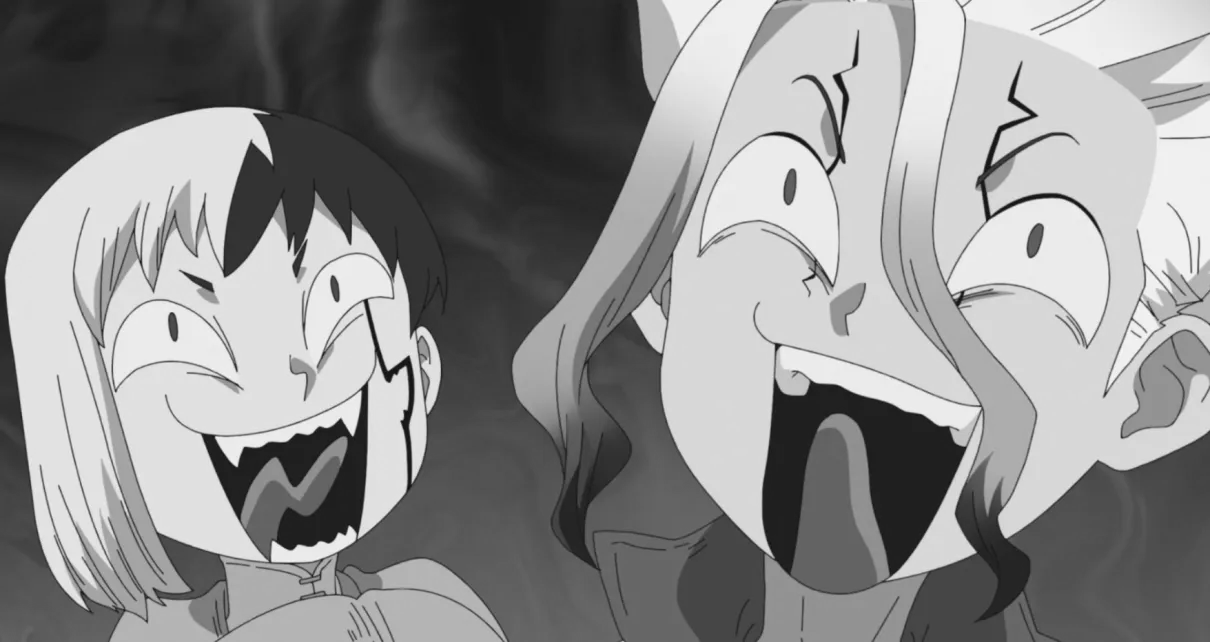

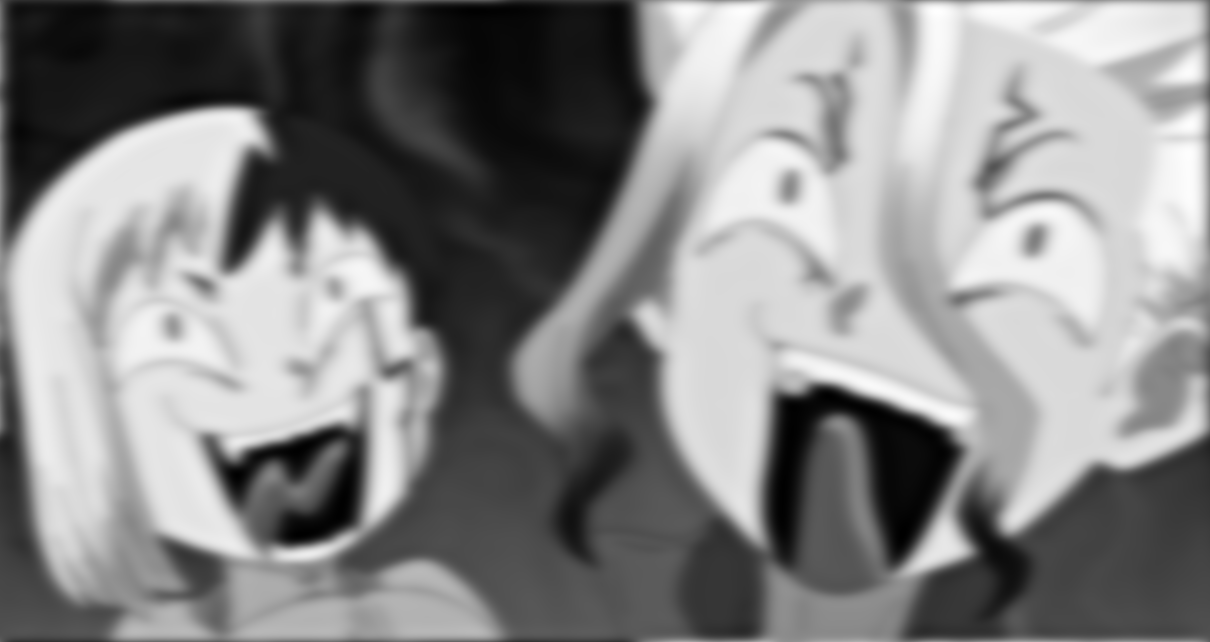

In [10]:
import numpy as np
import cv2
from scipy.fftpack import fftshift, ifftshift, fft2, ifft2
from google.colab.patches import cv2_imshow

def butterworth_lowpass_filter(shape, cutoff, order):
    P, Q = shape
    H = np.zeros((P, Q), dtype=np.float32)
    for u in range(P):
        for v in range(Q):
            D_uv = np.sqrt((u - P/2)**2 + (v - Q/2)**2)
            H[u, v] = 1 / (1 + (D_uv / cutoff)**(2 * order))
    return H

def apply_filter(image, filter):
    dft = fftshift(fft2(image))
    dft_filtered = dft * filter
    image_filtered = np.abs(ifft2(ifftshift(dft_filtered)))
    return image_filtered

# Load image in grayscale
image = cv2.imread('/content/Dr_Stone_New_World-Episode_05-Figure-06 (1).webp', cv2.IMREAD_GRAYSCALE)

# Define Butterworth low-pass filter parameters
cutoff = 30  # Cutoff frequency
order = 2    # Filter order

# Create Butterworth low-pass filter
filter = butterworth_lowpass_filter(image.shape, cutoff, order)

# Apply filter to image
filtered_image = apply_filter(image, filter)

# Normalize and convert to uint8
filtered_image = cv2.normalize(filtered_image, None, 0, 255, cv2.NORM_MINMAX)
filtered_image = np.uint8(filtered_image)

# Save or display the result
cv2_imshow(image)
cv2_imshow(filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
